### 1. Importing all the libraries 

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle

#### Load the dataset as df


In [2]:
df = pd.read_csv("TASK-ML-INTERN.csv")

### 2. Exploratory Data Analysis

In [72]:
# provide inofrmation about data such as data type ,size of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 449 entries, 0 to vomitoxin_ppb
dtypes: float64(449)
memory usage: 1.7 MB


#### Descriptive statistic of data "Summarize the data give overview such as mean , standard deviation , quartiles,min and max

In [73]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,5.597026
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,2.955096
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,4.930369
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,6.216606
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,7.438972
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,11.782960


In [5]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


Our data has 500 columns and 450 rows 

In [6]:
df.shape

(500, 450)

### Handling missing values

In [7]:
df.isnull().sum()

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(0)

##### we have no missing data in the dataset 

In [ ]:
df.duplicated().sum()    

np.int64(0)

No duplicate data

#### Dealing with outliers ( We analyse if our dataset is prone to outliers using histogram ,skewness and kurtosis)


Text(0.5, 1.0, 'the frequency of vomitoxin_ppb is right skewed')

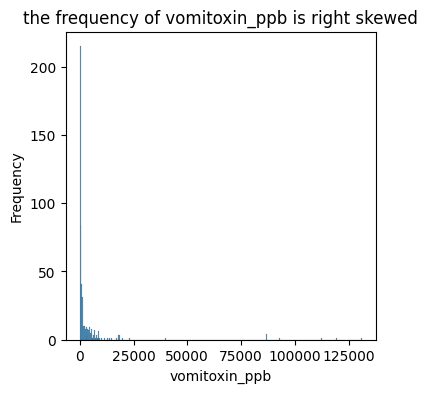

In [10]:
plt.figure(figsize=(4,4))
sns.histplot(df['vomitoxin_ppb'])
plt.ylabel("Frequency")
plt.title("the frequency of vomitoxin_ppb is right skewed")


Our data is highly right skewed as shown in the diagram

In [11]:
print("the mean of vomitoxin ppb is ",df['vomitoxin_ppb'].mean())

the mean of vomitoxin ppb is  3410.006


In [12]:
print("the mean of vomitoxin ppb is ",df['vomitoxin_ppb'].max())

the mean of vomitoxin ppb is  131000.0


As our data is higly skewed as most values are concentrated near the lower end, with a long tail extending toward high values and the average of DON is around 3410 whereas there are high outliers as maximum DON is around 131000


In [13]:
print ("skewness:",df['vomitoxin_ppb'].skew())
print("Kurtosis:",df['vomitoxin_ppb'].kurtosis())

skewness: 7.225180854841568
Kurtosis: 55.54468473132653


### Applying log1p for outlier reduction
It compress the high outlier values to create more mornal distribution and less sensitive to outliers

In [14]:
df['vomitoxin_ppb'] = np.log1p(df['vomitoxin_ppb'])

Text(0.5, 1.0, 'the frequency of vomitoxin_ppb is right skewed')

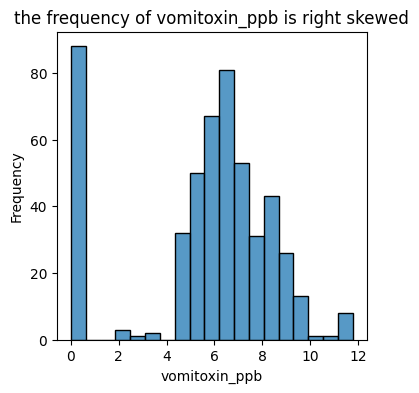

In [15]:
plt.figure(figsize=(4,4))
sns.histplot(df['vomitoxin_ppb'])
plt.ylabel("Frequency")
plt.title("the frequency of vomitoxin_ppb is right skewed")


In [16]:
print ("skewness:",df['vomitoxin_ppb'].skew())
print("Kurtosis:",df['vomitoxin_ppb'].kurtosis())

skewness: -0.8039843311270437
Kurtosis: -0.13635430384449165


### Correlation between features and target

In [17]:
df.corr(numeric_only=['int'])


,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,1.000000,0.950193,0.939032,0.936436,0.939845,0.932877,0.929035,0.919274,0.926197,0.919924,...,0.663732,0.679829,0.670432,0.669160,0.678192,0.663484,0.665115,0.678180,0.673962,-0.081878
1,0.950193,1.000000,0.947421,0.942850,0.940810,0.941707,0.932305,0.927004,0.929760,0.929151,...,0.677479,0.687372,0.680678,0.683569,0.686211,0.671872,0.676445,0.686367,0.682848,-0.081728
2,0.939032,0.947421,1.000000,0.944810,0.944345,0.942053,0.937859,0.932574,0.931288,0.931257,...,0.681920,0.691687,0.687939,0.688620,0.696341,0.677799,0.681920,0.692196,0.695569,-0.081694
3,0.936436,0.942850,0.944810,1.000000,0.946280,0.945929,0.935430,0.937877,0.935082,0.927987,...,0.700152,0.707781,0.698630,0.699114,0.707400,0.688762,0.695613,0.701369,0.706403,-0.070142
4,0.939845,0.940810,0.944345,0.946280,1.000000,0.946352,0.945448,0.938435,0.938747,0.937692,...,0.682960,0.690370,0.677965,0.682754,0.695040,0.671909,0.677817,0.685099,0.689308,-0.077833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0.663484,0.671872,0.677799,0.688762,0.671909,0.679614,0.686889,0.707347,0.716562,0.722288,...,0.969709,0.965391,0.967771,0.967283,0.968664,1.000000,0.966709,0.969010,0.968569,-0.023970
445,0.665115,0.676445,0.681920,0.695613,0.677817,0.688736,0.698695,0.714408,0.729598,0.724915,...,0.969473,0.965831,0.966412,0.965261,0.969702,0.966709,1.000000,0.967410,0.966935,-0.007859
446,0.678180,0.686367,0.692196,0.701369,0.685099,0.691850,0.703012,0.718943,0.731926,0.731118,...,0.967918,0.964108,0.967219,0.964582,0.969611,0.969010,0.967410,1.000000,0.966116,-0.014727
447,0.673962,0.682848,0.695569,0.706403,0.689308,0.696759,0.705035,0.721604,0.734676,0.731249,...,0.968571,0.964016,0.966748,0.966801,0.968205,0.968569,0.966935,0.966116,1.000000,-0.019474


### Determining average spectral reflectance 
by using line plot and mean

In [18]:
df_reflectance = df.drop(['vomitoxin_ppb','hsi_id'],axis=1)

In [19]:
df_reflectance = df_reflectance.mean()

([], [])

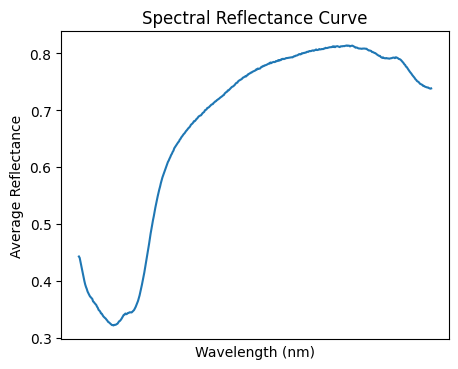

In [20]:
plt.figure(figsize=(5,4))
plt.plot(df_reflectance.index,df_reflectance.values)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Average Reflectance")
plt.title("Spectral Reflectance Curve")
plt.xticks([])  


Hsi id wont be useful in our model so we drop this column

In [21]:
df.drop(['hsi_id'],inplace=True,axis=1)


#### Sample Correlation
using heatplot and sample features from dataset

Text(0.5, 1.0, 'correlation within 20 sample spectral reflectance')

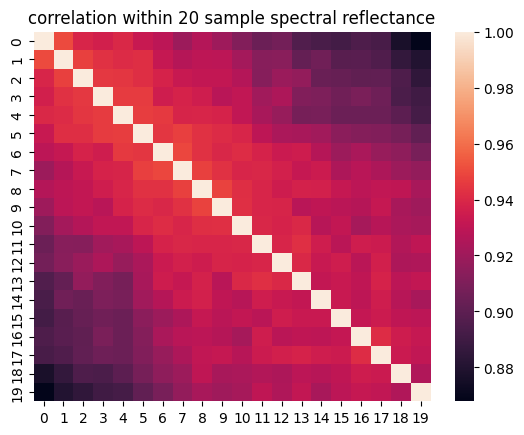

In [22]:
sample = df.columns[:20]
sample2= df.columns[-21:-1]
sns.heatmap(df[sample].corr(), annot=False)
plt.title("correlation within 20 sample spectral reflectance")

Text(0.5, 1.0, 'correlation within 20 last spectral reflectance')

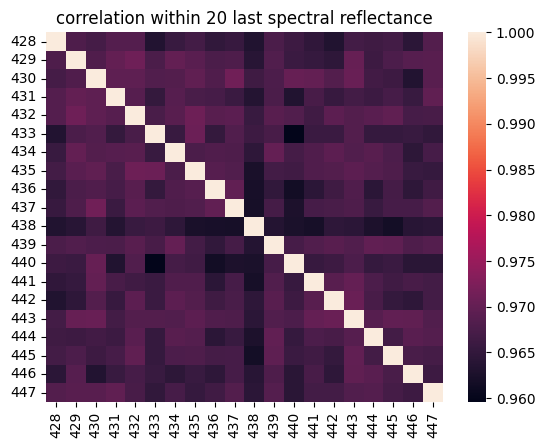

In [23]:
sns.heatmap(df[sample2].corr(), annot=False)
plt.title("correlation within 20 last spectral reflectance")

### 3. Data splitting for training and testing


In [24]:
X = df.drop(['vomitoxin_ppb'],axis = 1)
y=df['vomitoxin_ppb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 4. Scaling the data 
using standard scaler which zeroes the mean and units the standard deviation

In [25]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

### 5. Applying PCA
PCA used for feature reduction by keeping the maximum variance 

In [27]:
pca = PCA()
pca.fit(scaled_train)


PCA()

In [28]:
explained_variance_ratio = pca.explained_variance_ratio_

In [29]:
explained_variance_ratio_REPORT = pd.Series(explained_variance_ratio[:11])

In [30]:
explained_variance_ratio_REPORT = explained_variance_ratio_REPORT.apply(lambda x: np.round(x*100,2))


In [31]:
cumulative_variance = np.cumsum(explained_variance_ratio)
cumulative_variance_REPORT = pd.Series(cumulative_variance[:11])

In [32]:
cumulative_variance_REPORT = cumulative_variance_REPORT.apply(lambda x: np.round(x*100,2))

In [33]:
variance_report = pd.DataFrame([explained_variance_ratio_REPORT,cumulative_variance_REPORT ],index=["Variance Ratio","Cumulative variance"])

In below report we can determine the maximum variation is happening upto 95 is after 3 components

In [34]:
variance_report

,0,1,2,3,4,5,6,7,8,9,10
Variance Ratio,87.24,5.65,2.19,1.12,0.24,0.08,0.05,0.04,0.04,0.04,0.04
Cumulative variance,87.24,92.89,95.08,96.19,96.43,96.52,96.57,96.61,96.65,96.69,96.73


In [40]:
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components to explain 95% variance: {n_components_95}')

Number of components to explain 95% variance: 3


after using those 3 component our shape of data will be changed to reduced feature 3

In [41]:
final_pca = PCA(n_components=0.95)
X_train_pca = final_pca.fit_transform(scaled_train)
X_test_pca = final_pca.transform(scaled_test)

C:\Users\simra\AppData\Local\Temp\ipykernel_3120\1614203897.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],  cmap='viridis', alpha=0.6)  # Color by target variable if applicable


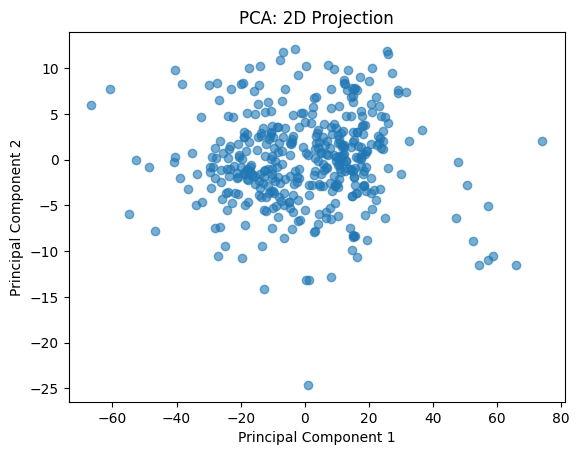

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],cmap='viridis', alpha=0.6)  # Color by target variable if applicable
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: 2D Projection")

plt.show()

In [43]:
X_train_pca.shape

(400, 3)

### 6. Appying grid search for tuning hyper paramater

this grid search contain few paramter such as n_estimator means no of trees , deth of tree,minimum no of sample splits,min number of sample required to be at leaf node , number of features to consider when looking for the best split

In [44]:
param_grid = {
    'n_estimators': [100, 200, 300],       
    'max_depth': [10, 20, 30, None],       
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],         
    'max_features': ['sqrt', 'log2']      
}


### 7. Applying Model 
#### 1. Random Forest

In [45]:
randomforest_model = RandomForestRegressor()

In [46]:
gridscv = GridSearchCV(randomforest_model,param_grid=param_grid, cv=5, verbose=2,scoring='neg_mean_squared_error')

In [47]:
gridscv.fit(X_train_pca,y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [51]:
print(gridscv.best_estimator_)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5)


Our best estimator model has max depth 10, feature 'sqrt', minimum sample leaf 2 and minimum sample split 5

In [52]:
best_estimator = gridscv.best_estimator_

Using best estimator model to predict the testing data

In [57]:
pred = best_estimator.predict(X_test_pca)

here our model doesnt performing well as r sqaured is in negative 

In [58]:
print("mean  squared error :",mean_squared_error(pred,y_test))
print("r squared: ",r2_score(pred,y_test))

mean  squared error : 7.616246684828251
r squared:  -1.8677509222096536


#### 2. XGBoost

In [60]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 6, 10], 
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],  
    'colsample_bytree': [0.7, 0.8, 1.0], 
    'gamma': [0, 0.1, 0.2], 
    'min_child_weight': [1, 3, 5]  
}

In [61]:
xgb = XGBRegressor()
gridscv_xgb = GridSearchCV(xgb,param_grid=param_grid_xgb, cv=5, verbose=2,scoring='neg_mean_squared_error')
gridscv_xgb.fit(X_train_pca,y_train)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 10], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [62]:
gridscv_xgb.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:

xgb_pred = gridscv_xgb.best_estimator_.predict(X_test_pca)


Here our model is slightly better than Random forest 

In [70]:
print("MSE:", mean_squared_error(y_test, xgb_pred))
print("R²:", r2_score(y_test, xgb_pred))

MSE: 7.009195464709887
R²: 0.13662414222813601


In [120]:
X_train_reshaped = X_train_pca.reshape(X_train.shape[0], 1, 3)
X_test_reshaped = X_test_pca.reshape(X_test.shape[0], 1, 3)



In [121]:
X_train_reshaped.shape

(400, 1, 3)

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(3,)),  # Reduced complexity
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='linear')  # No activation (best for regression)
])



d:\project\ML_Task\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\simra\AppData\Local\Temp\ipykernel_3120\3592424976.py:8: UserWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  early_stop = EarlyStopping(monitor='val_loss',mode=max,baseline=7.0,patience=10 ,min_delta=0.001,restore_best_weights=True )


we want best and minimum MSE and save the model which gives minimum validation loss by using checkpoint we can save the best model

In [155]:
checkpoint = ModelCheckpoint(
    "best_model.keras",  
    monitor='val_loss',  
    save_best_only=True, 
    mode='min',          
    verbose=1             
)

In [156]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse')  

# Train model
history = model.fit(X_train_pca, y_train, epochs=350, batch_size=8, callbacks=[checkpoint],validation_data=(X_test_pca, y_test), verbose=1)



Epoch 1/350
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5520 
Epoch 1: val_loss improved from inf to 6.80051, saving model to best_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.5278 - val_loss: 6.8005
Epoch 2/350
33/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0329  
Epoch 2: val_loss did not improve from 6.80051
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.1615 - val_loss: 7.3157
Epoch 3/350
43/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5563
Epoch 3: val_loss did not improve from 6.80051
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4949 - val_loss: 6.9741
Epoch 4/350
43/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8876
Epoch 4: val_loss did not improve from 6.80051
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9151 - val_loss: 7.4624
Epoch 5/350
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0232
Epoch 5: val_loss did not improve from 6.80051
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0428 - val_loss: 7.0361
Epoch 6/350
47/50 ━━━━━━━━━━━━━━━

In [159]:
cnn_model_best = load_model("best_model.keras")

In [161]:
cnn_pred = cnn_model_best.predict(X_test_pca)
mse = mean_squared_error(y_test, cnn_pred)
r2 = r2_score(y_test, cnn_pred)

print("MSE:", mse)
print("R square :", r2)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MSE: 6.507556256578614
R square : 0.19841485469905185


As the dataset is small with 500 record with maximum columns the model not able to perform well on Random Forest Xgboost 

In [163]:
data = {"model":cnn_model_best,"pca":final_pca,"scaler":scaler}


In [167]:
with open ("model.pkl","wb") as file1:
    pickle.dump(data,file1)
